# **Сборный проект**

# **Описание проекта**

Вы работаете в международном интернет-магазине компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

    
# **План работы**
    
1. Загрузим файл с данными и изучим обшую информацию
2. Выполним предобработку данных:
   + Приведем названия столбцов к правильному виду
   + Изменим тип данных там, где потребуется
   + Проверим на пропуски и, там где это возможно, заполним
   + Проверим на наличие дубликатов
   + Добавим новые столбцы с необходимыми данными
3. Проведем исследовательский анализ данных:
   + Изучим динамику количества выпущенных игр по годам.
   + Изучим динамику продаж в зависимости от платформы.
   + Определим актуальный период для построения прогноза на 2017 год и продолжим анализ по данным за этот период
   + Определим лидеров продаж среди платформ, а так же растущие и падующие. Выберем несколько потенциально прибыльных платформ.
   + Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам и опишем результаты.
   + Изучим как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Изучим корреляцию
   + Соотнесем выводы с продажами игр на других платформах.
   + Рассмотрим общее распределение игр по жанрам, рассмотрим жанры с самыми высокими и низкими продажами.
4. Составим портрет пользователя каждого региона, определим и изучим разницу:
   + Топ 5 самых популярных платформ.
   + Топ 5 самых популярных жанров.
   + Изучим влияние рейтинга ESRB на продажи в отдельном регионе
5. Проверим гипотезы:
   + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   + Средние пользовательские рейтинги жанров Action и Sports разные.
6. Напишем общий вывод.
   

## Получим файл с данными и изучим общую информацию

In [1]:
!pip install matplotlib==3.7.2
!pip install mplcyberpunk
!pip install missingno

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom
import plotly.graph_objects  as go
import mplcyberpunk
import missingno as msno

Считаем данные из csv файла в датафрейм и сохраним в переменную data

In [3]:
data = pd.read_csv('/datasets/games.csv')

Изучим общую информацию

In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В некоторых столбцах есть пропуски, выведем их названия с количеством пропусков в каждом

In [6]:
def gaps(data):
    for col in data.columns:
            gaps = data[col].isna().sum()
            if gaps > 0:
                print(f'Количество пропусков в столбце {col} ({data[col].dtypes}): {gaps}, {(gaps / len(data)):.2%} от всех данных')

In [7]:
gaps(data)

Количество пропусков в столбце Name (object): 2, 0.01% от всех данных
Количество пропусков в столбце Year_of_Release (float64): 269, 1.61% от всех данных
Количество пропусков в столбце Genre (object): 2, 0.01% от всех данных
Количество пропусков в столбце Critic_Score (float64): 8578, 51.32% от всех данных
Количество пропусков в столбце User_Score (object): 6701, 40.09% от всех данных
Количество пропусков в столбце Rating (object): 6766, 40.48% от всех данных


<Axes: >

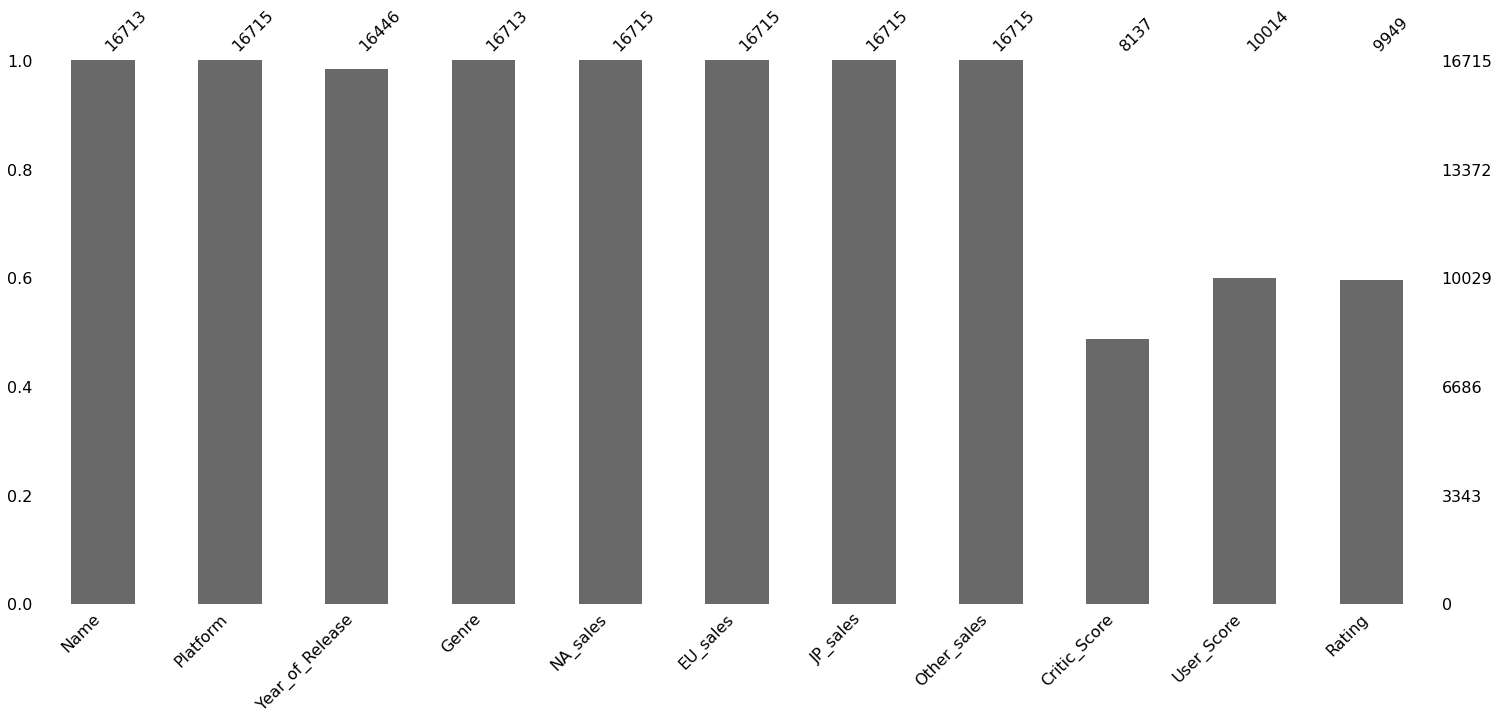

In [8]:
msno.bar(data)

<Axes: >

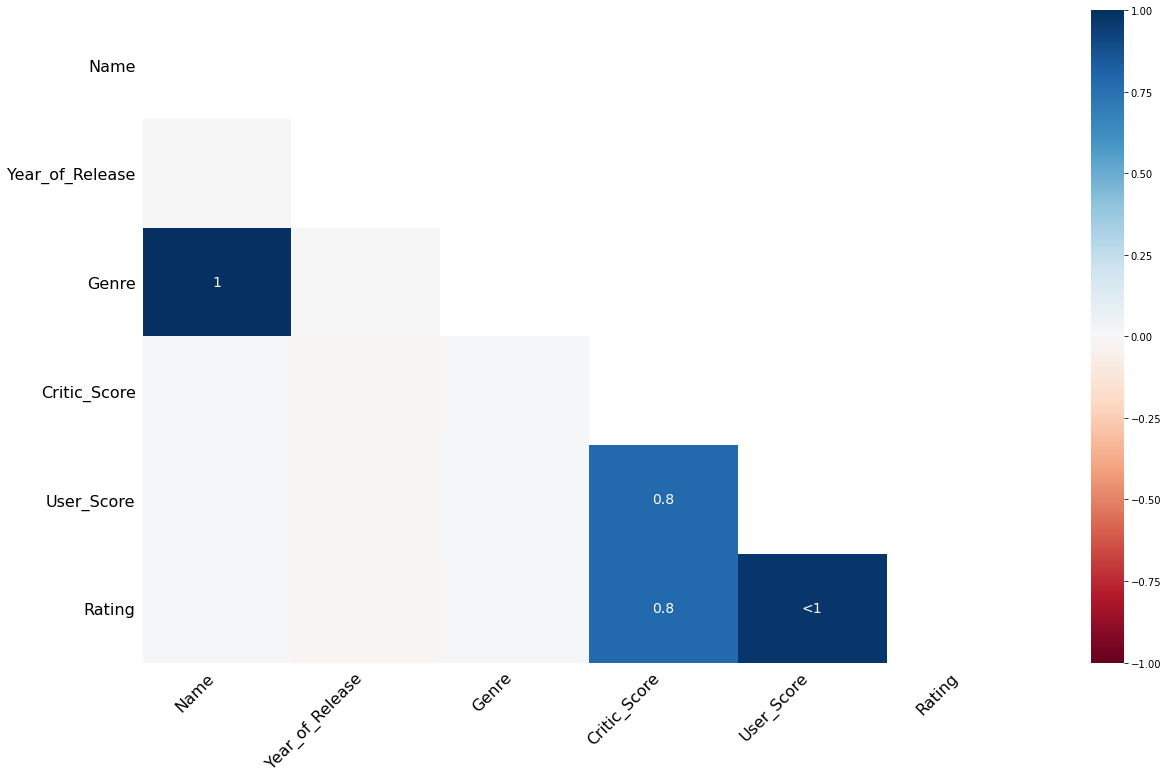

In [9]:
msno.heatmap(data)

In [10]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Данные в столбце `user_score` имеют тип `object`, выведем все уникальные значения этого столбца и посмотрим в чем может быть причина

In [11]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо оценок от 0 до 10 и `NaN`, встречается и `tbd`, выведем несколько строк с `tbd` в графе оценка

In [12]:
data.query('User_Score == "tbd"').head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Каких-то явных закономерностей не прослеживается

Напишем функцию построения графика всех уникальных значений переданного столбца 

In [13]:
def unique(data):
    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(15,6))
        ax = data.value_counts().sort_values().plot(kind='barh', color='pink')
        plt.grid(color='#696969')
        plt.bar_label(ax.containers[0])

Выведем все представленные в датафрейме платформы

Построим график с количеством игр на каждой из платформ

<Figure size 1080x432 with 0 Axes>

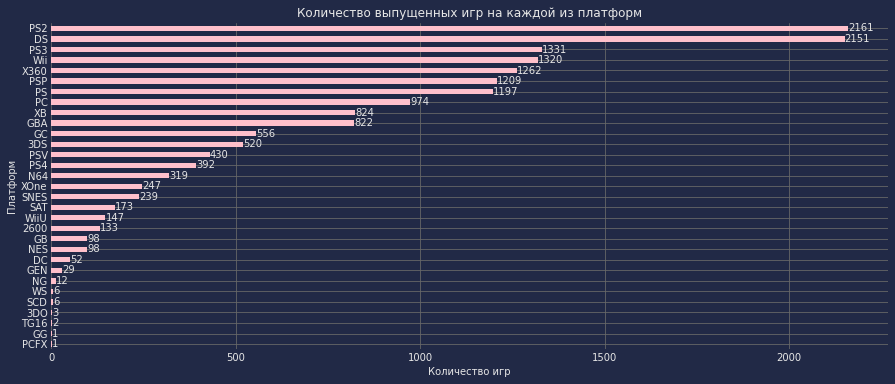

In [14]:
plt.figure(figsize=(15,6))
unique(data['Platform'])
plt.title('Количество выпущенных игр на каждой из платформ')
plt.xlabel('Количество игр')
plt.ylabel('Платформ');

Построим график с количеством игр каждого из жанров

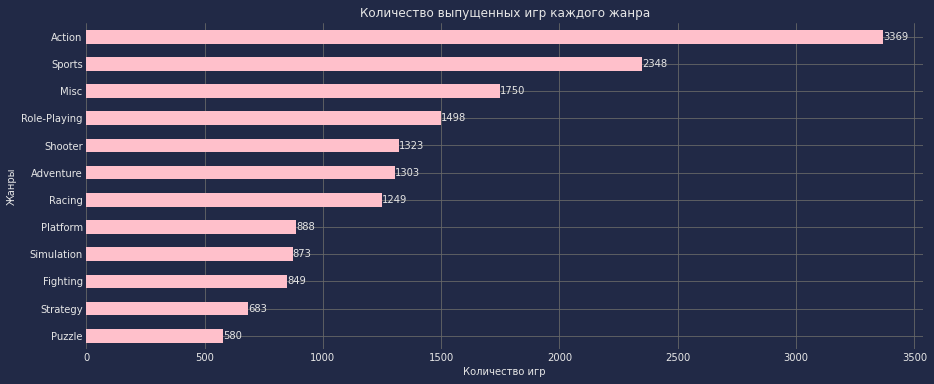

In [15]:
unique(data['Genre'])
plt.title('Количество выпущенных игр каждого жанра')
plt.xlabel('Количество игр')
plt.ylabel('Жанры');

Построим график с количеством игр каждого возрастного рейтинга

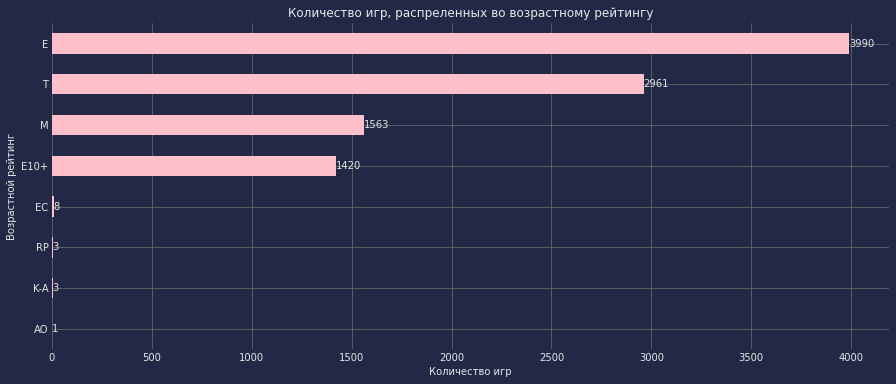

In [16]:
unique(data['Rating'])
plt.title('Количество игр, распреленных во возрастному рейтингу')
plt.xlabel('Количество игр')
plt.ylabel('Возрастной рейтинг');

1. Датафрейм содержит следующие данные:
  + Название игры
  + Платформа на которой выпущена игра, некоторые платформы представлены номинально
  + Год релиза, период охвата с 1980 по 2016 года.
  + Жанр, все жанры представлены в достаточно количестве, абсолютный лидер - `action`
  + О продажах в Америке, Европе, Японии и остальном мире
  + Рейтинги критиков и игроков
  + Возрастной рейтинг, из 8 вариантов возрастного рейтинга, 4 варианта представлены в совершенно незначительном количество, суммарно - 15 игр!  
2. Датафрейм требует предобработки
  + Неккоректные названия столбцов, необходимо будет привести их к нижнему регистру
  + В столбцах с возрастным рейтингом и оценками игр почти половина данных пропущено, а также есть две строки с пропуском в названии.
  + Необходимо поменять тип данных у столбцов с данными о годе выпуска, рейтинге игроков и критиков и возрастном рейтинге
  + Нужно разобраться с `tbd` в `user_score`

## Выолним предобработку данных

### Приведем названия столбцов к нижнему регистру.

In [17]:
data.columns = data.columns.str.lower()

Проверим изменения

In [18]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработаем пропуски

In [19]:
gaps(data)

Количество пропусков в столбце name (object): 2, 0.01% от всех данных
Количество пропусков в столбце year_of_release (float64): 269, 1.61% от всех данных
Количество пропусков в столбце genre (object): 2, 0.01% от всех данных
Количество пропусков в столбце critic_score (float64): 8578, 51.32% от всех данных
Количество пропусков в столбце user_score (object): 6701, 40.09% от всех данных
Количество пропусков в столбце rating (object): 6766, 40.48% от всех данных


#### Пропуски в `name` и `genre`

In [20]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 строки с пропусками в `name` содержат и оба пропуска в `genre`, избавимся от них

In [21]:
data.dropna(subset=['name'], inplace=True)

#### Пропуски в `year_of_release`

In [22]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Так как игры расположены не по хронологии выхода, а в дальнейшем нам потребуется выбрать данные за соответствующий период, то строки с пропусками в `year_of_release` можно отбросить

In [23]:
data.dropna(subset=['year_of_release'], inplace=True)

#### Пропуски в `critic_score`

Столбец `critic_score` имеет тип `float64` и 51.5% пропусков, с этими пропусками ничего не поделать, удалить нельзя так как потеряем больше половины выборки, а заполнение такого количества пропусков исказит все данные. Оставим NaN.

#### Пропуски в  `user_score` 

In [24]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо 6606 NaN, в столбце с оценками игроков встречается `tbd`, в мире компьютерных игр `TBD` - означает `To Be Determined`или `Будет определено`. Изучим годы выпуска этих игр.

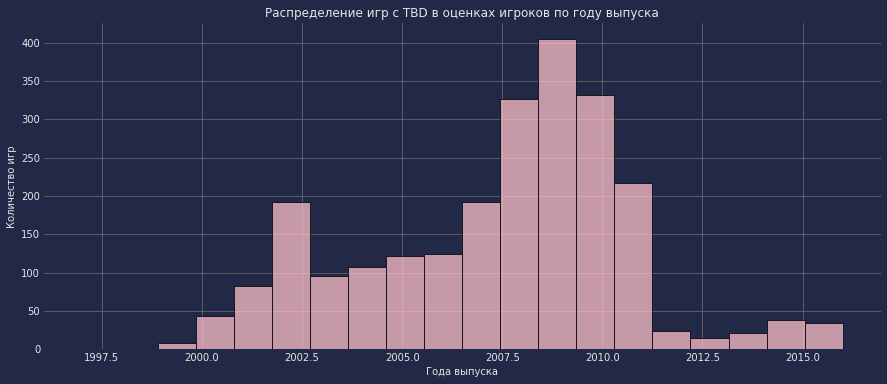

In [25]:
with plt.style.context('cyberpunk'):    
    data.query('user_score == "tbd"').hist('year_of_release', bins=20, figsize=(15, 6), color='pink', alpha=0.75, edgecolor='black')
    plt.xlabel('Года выпуска')
    plt.ylabel('Количество игр')
    plt.grid(color='#696969')
    plt.title('Распределение игр с TBD в оценках игроков по году выпуска');

In [26]:
data.query('user_score == "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,1056.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,60.766098
std,3.484229,0.176593,0.112068,0.026395,0.039411,11.190603
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


Игры с `tbd` не новые, неизвестно какой смысл вкладывал в `tbd` составитель таблицы, но в нашем случае, это равносильно пропускам, и стоит заменить на `NaN`, остальные же пропуски как и в случае с `critic_score` стоит оставить.

In [27]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [28]:
data['user_score'].isna().sum()

8981

Было 6605 `NaN` и 2376 `tbd` стало 8981 `NaN`, так и оставим

#### Пропуски в  `raiting`

In [29]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Никаких `tbd`, пропуски в этом столбце мы также оставим

Проверим еще раз пропуски

In [30]:
gaps(data)

Количество пропусков в столбце critic_score (float64): 8461, 51.45% от всех данных
Количество пропусков в столбце user_score (object): 8981, 54.62% от всех данных
Количество пропусков в столбце rating (object): 6676, 40.60% от всех данных


А также проверим сколько пропусков в строках с пропусками в `user_score`

In [31]:
gaps(data[data['user_score'].isna()])

Количество пропусков в столбце critic_score (float64): 7892, 87.87% от всех данных
Количество пропусков в столбце user_score (object): 8981, 100.00% от всех данных
Количество пропусков в столбце rating (object): 6593, 73.41% от всех данных


Абсолютное большинство пропусков в этих трех столбцах пересекается
* Из 8461 пропуска в столбце `critic_score` и 6676 пропусков в `rating`, на строки с пропусками в `user_score` приходится 7892 и 6593 пропуска соответственно

### Преобразуем данные в нужный тип

In [32]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [33]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [34]:
data['year_of_release'] = data['year_of_release'].astype('int32') 

In [35]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Добавим новый столбец с суммарными продажами во всех регионах

In [36]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [38]:
data.insert(loc=8, column='total_sales', value=(data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)))

In [39]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


### Проведем проверку на дубликаты

Проверим датафрейм на полные строки дубликаты

In [40]:
data.duplicated().sum()

0

Проверим ли встречаются дубликаты в названии игр

In [41]:
data['name'].duplicated().sum()

5018

In [42]:
data[data['name'].duplicated()]['name'].value_counts()

Need for Speed: Most Wanted                          11
LEGO Marvel Super Heroes                              8
Ratatouille                                           8
FIFA 14                                               8
The LEGO Movie Videogame                              7
                                                     ..
Gem Smashers                                          1
The Lord of the Rings: The Fellowship of the Ring     1
Ready 2 Rumble Boxing                                 1
White Album 2: Shiawase no Mukougawa                  1
Mark McMorris Infinite Air                            1
Name: name, Length: 2748, dtype: int64

Игра `Need for Speed: Most Wanted` встречается аж 11 раз, выведем все строки с этой игрой

In [43]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,4.37,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,1.56,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,1.04,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,0.56,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,0.27,45.0,6.1,E


В датафрейме каждая игра может встречаться несколько раз, в зависимости от того, на скольких платформах она выпущена

In [44]:
print(f'Из {len(data)} игр в датафрейме, уникальных игр - {len(data.drop_duplicates(subset="name", keep="first"))}')

Из 16444 игр в датафрейме, уникальных игр - 11426


### Рейтинг `RP`

`RP`Означает, что продукт ожидает получения рейтинга, выведем игры с такой оценкой 

In [45]:
data.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,0.04,63.0,6.8,RP


* На сайте `ESRB` сказано, что данная игра имеет рейтинг `E10+`, скорее всего,  ошибка при сборе данных.
* Так как у нас всего одна игра с эти рейтингом, да и то, ошибочным, стоит поменять рейтинг этой игры на актуальный

In [46]:
data.loc[data['rating'] == 'RP', 'rating'] = 'E10+'

### Промежуточный вывод

Мы выполнили предобработку данных:

  + Привели названия столбцов к нижнему регистру 
  + Избавились от строк с пропусками в `name`, `genre` и `year_of_release`. Оставили без изменений пропуски в `critic_score`,         `user_score` и `rating`
  + `tbd` в `user_score` заменили на `NaN`, посчитав это в нашем случае равнозначны
  + Преобразовали тип данных `user_score` в вещественный, а `year_of_release` в целочисленный
  + Добавили столбец с суммарными продажами во всех регионах
  + Строки дубликаты отсутствуют
	
Пропуски в столбцах с оценками в большинстве случаев совпадают, к сожалению, это сокращает нашу выборку в исследованиях связанными с оценками почти вдвое

## Проведем исследовательский анализ данных

### Изучим сколько игр выпускалось в разные годы

#### Для всех платформ

Отобразим на одной плоскости два графика выпуска игр по годам по необработанному датафрейму и по датафрейму без дубликатов в `name`

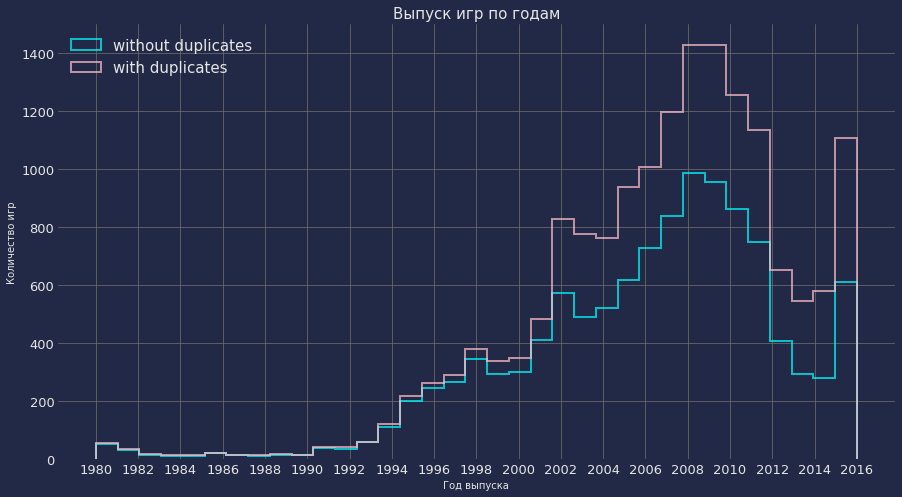

In [47]:
with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(15,8))

    ax = data.drop_duplicates(subset='name', keep='first')['year_of_release'].plot(
        kind='hist',
        histtype='step',
        bins=35,
        linewidth=2,
        label='without duplicates',
        legend=True,
        alpha=0.7,
        colormap='cool'
    )
    ax.grid(color='#696969')

    data['year_of_release'].plot(
        kind='hist',
        ax=ax,
        histtype='step',
        linewidth=2,
        bins=35,
        grid=True,
        label='with duplicates',
        legend=True,
        alpha=0.7,
        color='pink'
    )
    plt.xticks(np.arange(min(data['year_of_release']), max(data['year_of_release'] + 1), 2), size=13)
    plt.yticks(size=13)
    plt.legend(fontsize=15)
    plt.title('Выпуск игр по годам', size=15)
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество игр');

* С 1980 по 1990 новые игры практически не разрабатывали, но с 1990 начался неуклонный рост вплоть до пика в 2009
* До 2002 года графики практически идентичны, но дальше разница становится весьма значительной, в 2009 новых игр выпустили около 1000, а не 1400 как могло показаться по графику основанном на исходном датафрейме.
* С 2002 значительно увеличилось количество мультиплатформенных игр.

Построим отдельный график по данным без дубликатов за период с 2000 по 2016

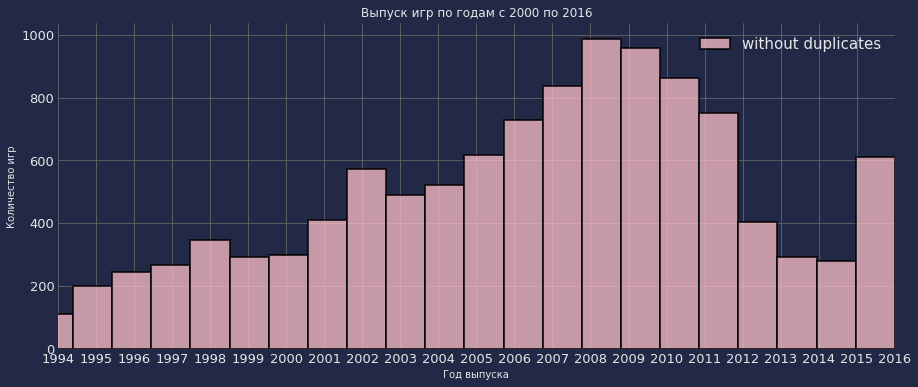

In [48]:
with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(15,6))
    ax = data.drop_duplicates(subset='name', keep='first')['year_of_release'].plot(
        kind='hist',
        bins=35,
        linewidth=2,
        label='without duplicates',
        legend=True,
        grid=True,
        color='pink',
        alpha=0.75,
        edgecolor='black'
    )
    
    plt.xlim(1994, 2016)
    plt.xticks(np.arange(1994, 2017, 1), size=13)
    plt.yticks(size=13)
    plt.title('Выпуск игр по годам с 2000 по 2016')
    plt.xlabel('Год выпуска')
    plt.legend(fontsize=15)
    plt.grid(color='#696969')
    plt.ylabel('Количество игр');

* с 2005 по 2012 наблюдается бум разработки и выпуска видеоигр, а с 2012 до 2015 снижение до уровня 2000 года.

#### Для каждой платформы отдельно

Создадим сводную таблицу с данными о суммарных продажах и количестве выпущенных игр для каждой платформы

In [49]:
top_platforms = (data
    .groupby('platform')
    .agg({'total_sales' : 'sum', 'name' : 'count'})
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
top_platforms.columns = ['platform', 'total_sales', 'release_count']

In [50]:
top_platforms

,platform,total_sales,release_count
0,PS2,1233.56,2127
1,X360,961.24,1232
2,PS3,931.34,1306
3,Wii,891.18,1286
4,DS,802.78,2121
5,PS,727.58,1190
6,PS4,314.14,392
7,GBA,312.88,811
8,PSP,289.53,1193
9,3DS,257.81,512


Индустрия компьютерных игр постоянно развивалась, и те платформы, которые были абсолютными лидерами в прошлом веке, по количеству релизов не сравнятся с современными платформами. Однако, можно увидеть что платформы, расположенные ниже `DC`, имеют совершенно незначительное количество релизов даже относительно своих современников.

Отбросим эти платформы


In [51]:
actually_top_platforms = top_platforms.iloc[:24]

Создадим сводную таблицу с количеством релизов для каждой платформы в заданные периоды времени

In [52]:
cut_bins=[1979, 1986, 1991, 1996, 2001, 2006, 2011, 2016]
cut_labels=['from_80_to_86', 'from_87_to_91', 'from_92_to_96', 'from_97_to_01', 'from_02_to_06', 'from_07_to_11', 'from_12_to_16']

platform_release = (data               
    .pivot_table(
        columns=(pd.cut(data['year_of_release'], bins=cut_bins, labels=cut_labels)),
        index=data.query('platform in @actually_top_platforms["platform"]')['platform'],
        values='name',
        aggfunc='count')
    .sort_values(by=['from_80_to_86',
                     'from_87_to_91',
                     'from_92_to_96',
                     'from_97_to_01',
                     'from_02_to_06',
                     'from_07_to_11',
                     'from_12_to_16'],
                 ascending=False)
)

Построим теплову карту по данным из нашей таблицы 

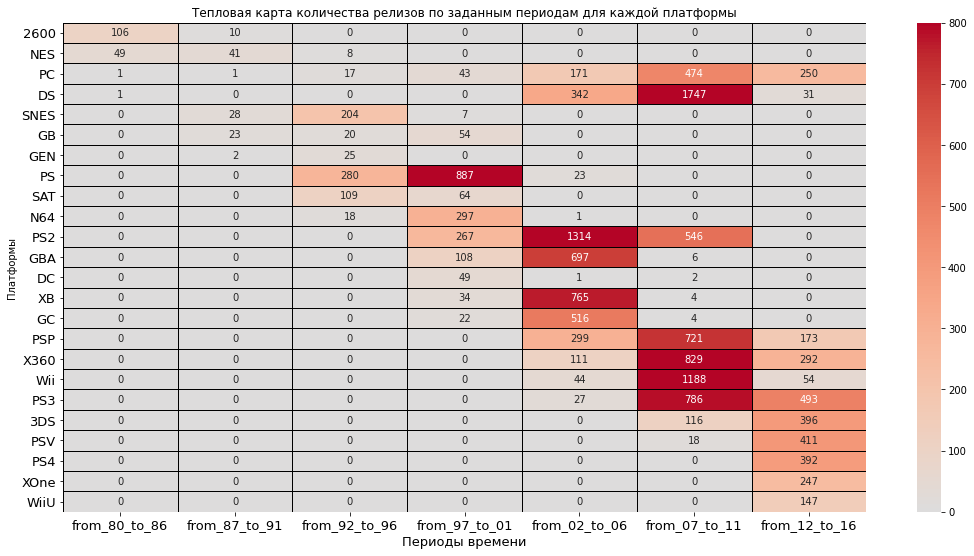

In [53]:
fig, ax = plt.subplots(figsize=(18, 9))
ax = sns.heatmap(platform_release, annot=True, fmt='.0f', linewidths=1, linecolor='black', center=0, vmax=800, cmap='coolwarm')
plt.title('Тепловая карта количества релизов по заданным периодам для каждой платформы')
plt.ylabel('Платформы')
plt.xlabel('Периоды времени', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show();

* По нашей тепловой карте ясно видна тенденция к росту количества актуальных платформ для каждого следующего временного отрезка.
* Актуальность свою платформа сохраняет обычно не более 5-10 лет

Рассмотрим подробнее сколько платформа остается актуальной: возьмем несколько верхних платформ из нашего топа `top_platforms` и построим график изменения количества релизов по годам для каждой платформы.

In [54]:
top_8 = top_platforms.iloc[:8]

In [55]:
top_8

,platform,total_sales,release_count
0,PS2,1233.56,2127
1,X360,961.24,1232
2,PS3,931.34,1306
3,Wii,891.18,1286
4,DS,802.78,2121
5,PS,727.58,1190
6,PS4,314.14,392
7,GBA,312.88,811


Напишем функцию построения графика ежегодной динамики релизов для каждой из платформ

In [56]:
def release_dynamics(data):
    x = data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(15, 6))
        x.plot(legend=True, ax=ax, grid=True, style='-o', linewidth=3, colormap='tab20', alpha=0.80)
        plt.yticks(size=13)
        plt.ylabel('Количество релизов', size=12)
        plt.xlabel('Год', size=12)
        plt.ylim(-50, 550)
        plt.title('График динамики релизов', size=15)
        plt.legend(fontsize=10)
        ax.grid(color='#696969')   

Строим график

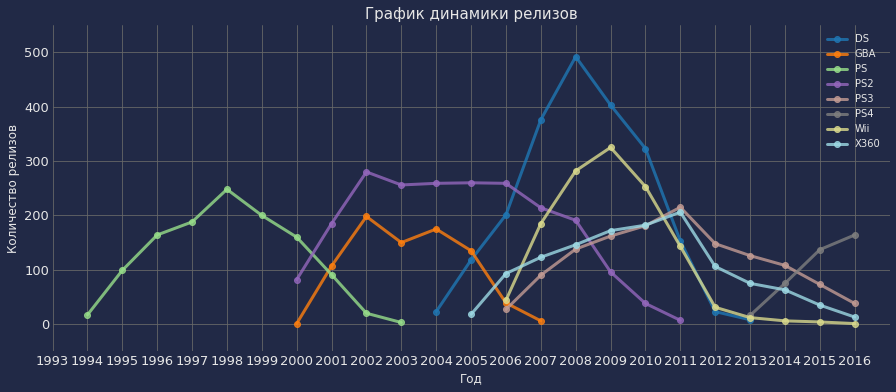

In [57]:
release_dynamics(data.query('platform in @top_8["platform"]'))
plt.xlim(1993, 2017)
plt.xticks(np.arange(1993, 2017, 1), size=13)
plt.show()

График подтверждает предыдущие выводы: ни одна из платформ на графике не сохраняла актуальность дольше 10 лет, в среднем, актуальной платформа остается 5-6 лет.

* Абсолютным лидером по количеству релизов до 2016 года являются `PS2` и `DS`
* С течением времени, старые платформы теряют актуальность, но актуальных платформ становится больше чем было.
* Актуальность платформа сохраняет 5-6 лет.
* На графике видны пересения линий соответствующие родным платформам разного поколения, старая актуальность теряет, новая набирает.

С учетом этого, для прогнозирования продаж на 2017 год данные нужны только по платформам, которые будут  актуальны в 2017 и возможно по платформам предыдущего для них поколения.

### Посмотрим как менялись продажи по платформам

Создадим сводную таблицу с суммарными продажами за определенные периоды времени для каждой платформы.

In [58]:
platform_sales = (data               
    .pivot_table(
        columns=(pd.cut(data['year_of_release'], bins=cut_bins, labels=cut_labels)),
        index=data.query('platform in @actually_top_platforms["platform"]')['platform'],
        values='total_sales',
        aggfunc='sum')
    .sort_values(by=['from_80_to_86',
                     'from_87_to_91',
                     'from_92_to_96',
                     'from_97_to_01',
                     'from_02_to_06',
                     'from_07_to_11',
                     'from_12_to_16'],
                 ascending=False)
)

Построим тепловую карту по данным из нашей сводной таблицы

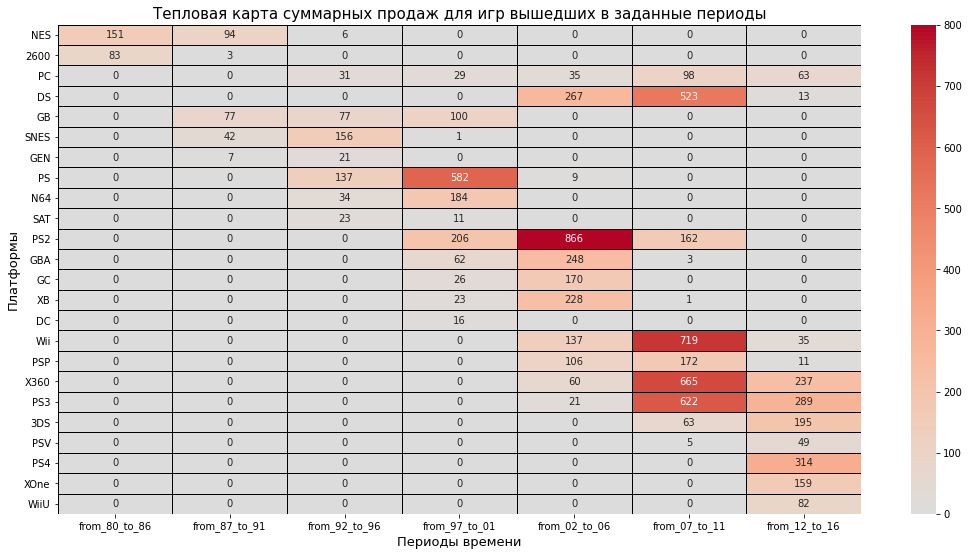

In [59]:
fig, ax = plt.subplots(figsize=(18, 9))
ax = sns.heatmap(platform_sales, annot=True, fmt='.0f', linewidths=1, linecolor='black', center=0, vmax=800, cmap='coolwarm')
plt.title('Тепловая карта суммарных продаж для игр вышедших в заданные периоды', size=15)
plt.ylabel('Платформы', size=13)
plt.xlabel('Периоды времени', size=13)
plt.show();

* Тепловая карта продаж еще более явно демонстрирует, что актуальность платформа сохраняет не более 5 лет
* С 97 по 2006 явно наблюдается безусловный лидер по продажам среди платформ, однако с 2007, и, особенно явно, с 2012 видно, что абсолютного лидера уже нет, и продажи равномерно распределены среди всех актуальных платформ

И, также, построим график динамики ежегодных суммарных продаж для каждой платформы.
  - Возьмем также 8 самых успешных платформ

Напишем функцию построения графика динамики суммарных продаж для каждой из платформ по годам

In [60]:
def sales_dynamic(data):
    x = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(15, 6))
        x.plot(legend=True, ax=ax, grid=True, style='-o', linewidth=3, colormap='tab20', alpha=0.8)
        plt.yticks(size=13)
        plt.ylim(-25, 250)
        plt.ylabel('Суммарные продажи в млн. копий', size=12)
        plt.xlabel('Год выпуска', size=12)
        plt.title('График динамики суммарных продаж', size=15)
        plt.legend(fontsize=10)
        ax.grid(color='#696969')

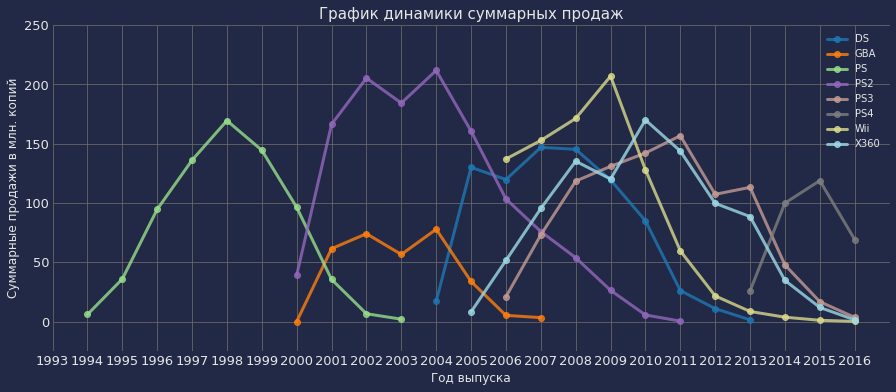

In [61]:
sales_dynamic(data.query('platform in @top_8["platform"]'))
plt.xlim(1993, 2017)
plt.xticks(np.arange(1993, 2017, 1), size=13)
plt.show()

* Платформа остается актуальной около 5-7 лет, об этом лучше говорят графики с продажами
* Это характерный срок для возникновения старых платформ, например `Play Station` выпускала свои новые платформы 5-6 лет
- В течение 1-3 лет после появления платформы нового поколения, продажи игр на платформах старого поколения сходят на нет


### Выберем данные за актуальный период


Напишем функцию вывода графика суммарных продаж по платформам по заданным данным

In [62]:
def platform_sales_plot(data): 
    with plt.style.context('cyberpunk'):
        x = (data
              .groupby('platform')
              .agg({'total_sales' : 'sum'})
              .sort_values(by='total_sales')
            )
        labels =  ((100 * x['total_sales'] / x['total_sales'].sum()).round(2)).astype('str') + '%'
            
        ax = x.plot(kind='barh', color='pink', figsize=(12, 4))
        plt.xticks(np.arange(0, x['total_sales'].max(), 50), size=13)     
        plt.xlabel('Суммарные продажи в млн. копий')
        plt.ylabel('Платформы')
        plt.title('График суммарных продаж для каждой из платформ')
        ax.grid(color='#696969')
        plt.legend(loc='lower right')
        plt.bar_label(ax.containers[0], labels,  label_type='edge', fontweight='light')
        

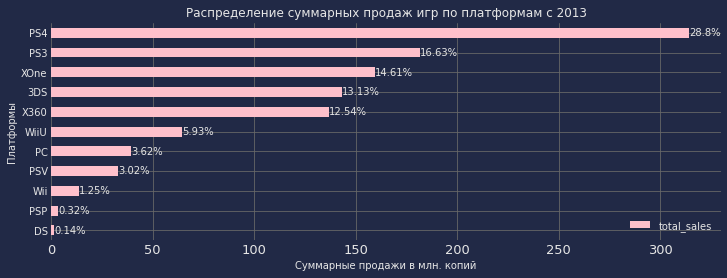

In [63]:
platform_sales_plot(data.query('year_of_release >= 2013'))
plt.title('Распределение суммарных продаж игр по платформам с 2013');

- Актуальный период - тот, на основании данных за который мы сожем построить прогноз на 2017
- Новое поколение платформ вышло в 2013, однако нам могут понадобиться данные за более ранний период. Игры выходят не каждый год, и, например, несколько мульплатформенных игр-долгостроев определенного жанра могут принести множество продаж и повлиять на рейтинг распределения жанров по прибыли.
- Также, мы не может оценить ежегодные суммарные продажи, только суммарные продажи той или иной игры вышедшей в определенном году. Игры которые вышли, например, в 2016 зачастую не покажут тех продаж, которые показывают игры, находящиеся на рынке несколько лет.
- Разумнее взять данные по новым актуальным платформам и платформам предыдущего поколения ради большей выборки - это данные за последние 10 лет с 2007 по 2016
- Можно использовать сразу две выборки для отслеживания изменнения тенденций: с 2007 и с 2013 которому соответствует появления новых платформ.

In [64]:
actual_data = data.query('year_of_release >= 2013')

In [65]:
actual_data_extended = data.query('year_of_release >= 2007')

In [66]:
actual_data.shape[0]

2233

In [67]:
actual_data_extended.shape[0]

9327

Строк с данными с 2007 года более чем в 4 раза больше чем строк с данными с 2013, хорошо будет иметь возможность выбора и сравнения этих двух выборок.

### Изучим динамику платформ и выберем потенциально прибыльные

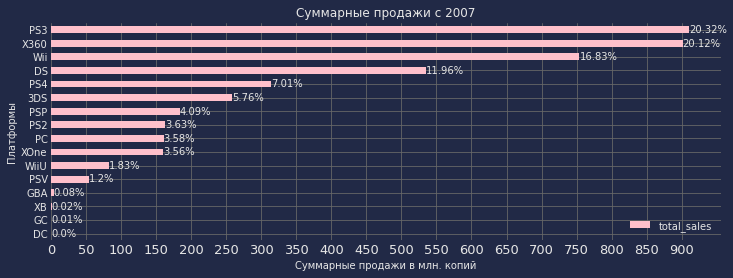

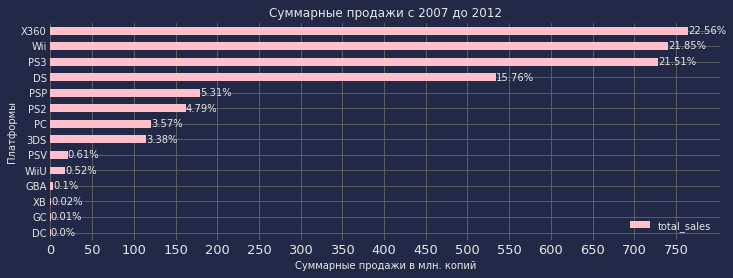

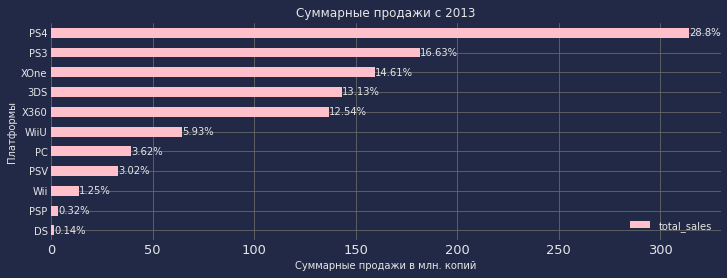

In [68]:
platform_sales_plot(actual_data_extended)
plt.title('Суммарные продажи с 2007')
platform_sales_plot(actual_data_extended.query('year_of_release < 2013'))
plt.title('Суммарные продажи с 2007 до 2012')
platform_sales_plot(actual_data)
plt.title('Суммарные продажи с 2013');

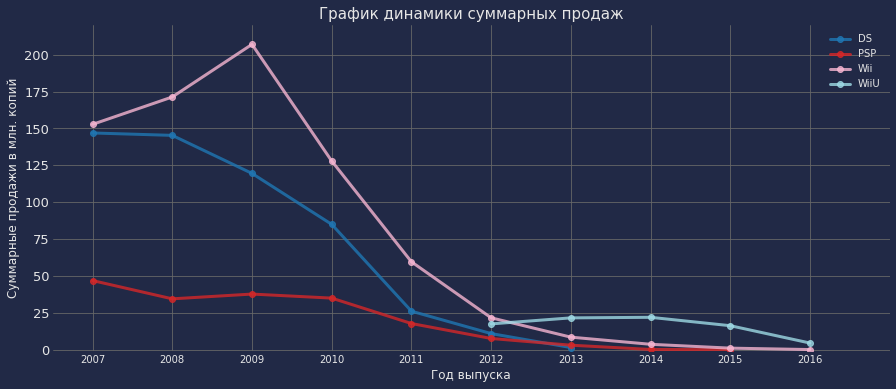

In [69]:
sales_dynamic(actual_data_extended.query('platform in ["PSP", "DS", "Wii", "WiiU"]'))
plt.ylim(-1, 220)
plt.xlim(2006.5, 2017)
plt.xticks(np.arange(2007, 2017, 1));

* Из всех проданных игр  с 2007 по 2012 **65%** всех продаж приходится на игры выпущенные на  `X360`, `Wii` и `PS3`.
* После появления в 2013 `PS4` и `XOne` они стали отвоевывать рынок и с 2013 по 2016, на их долю приходится  **43%** против **29%** прошлых лидеров. Причем `PS4` вдвое обходит `XOne` по продажам.
* С 2007 по 2012 `X360` лидировал по суммарным продажам игр, но  с 2013 по 2016 опустился на 5 место с 12.5% продаж.

* Продажи игр на платформах `DS`,  `PSP` сошли на нет в 2013 и 2015 годах соответственно, продажи `Wii` находятся в крутом пике и достигают минимума в 2016.  Уберем их из нашей выборки как неактуальные.
* Нас интересуют данные с 2007 как расширение выборки, но только касательно тех платформ, что актуальны в 2013-2016, поэтому отбросим из `actual_data_extended` платформы которых нет в `actual_data`

In [70]:
actual_data = actual_data.query('platform not in ["PSP", "DS", "Wii"]')

In [71]:
actual_data_extended = actual_data_extended.query('platform in @actual_data["platform"]')

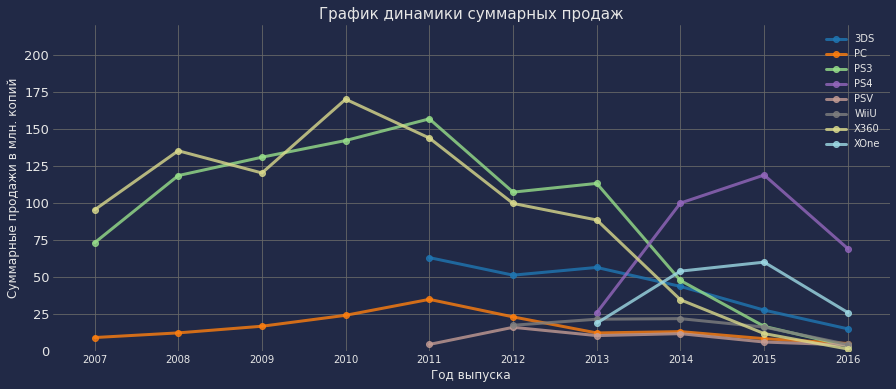

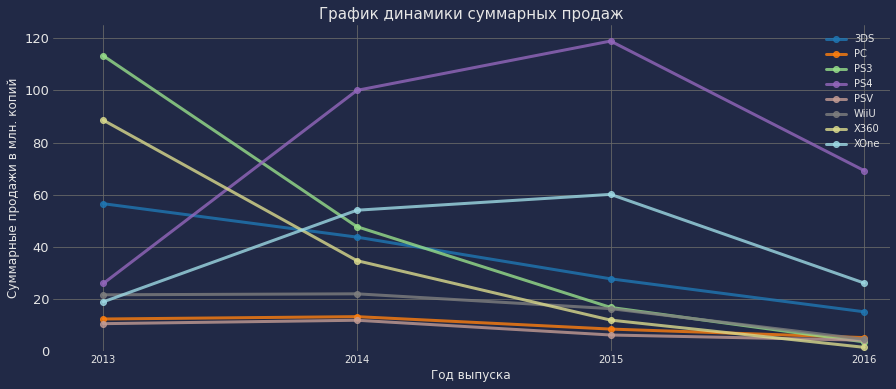

In [72]:
sales_dynamic(actual_data_extended)
plt.xlim(2006.5, 2016.5)
plt.ylim(0, 220)
plt.xticks(np.arange(2007, 2017, 1))
sales_dynamic(actual_data)
plt.xlim(2012.8, 2016.1)
plt.ylim(0, 125)
plt.xticks(np.arange(2013, 2017, 1));

Выведем отдельно графики динамики продаж и релизов игр выпущенных на `PC` и на приставка `PlayStation`

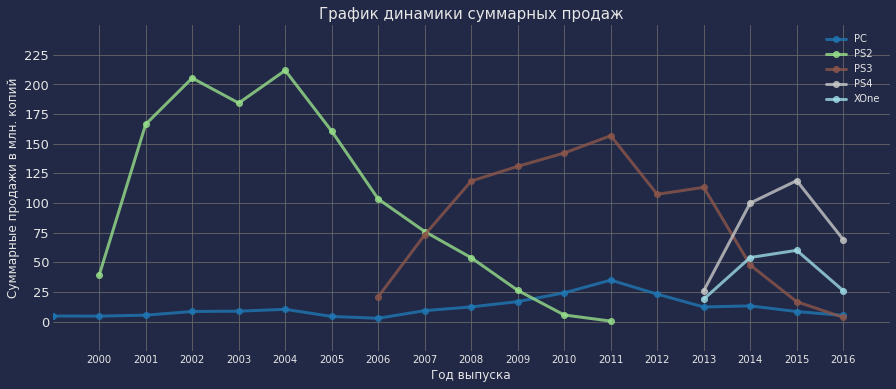

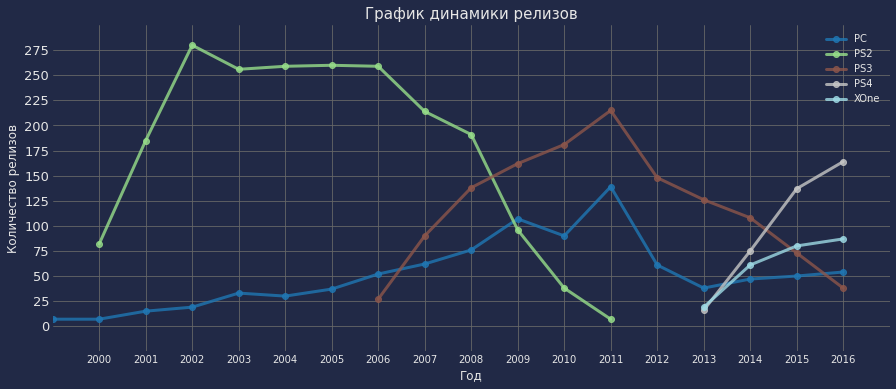

In [73]:
sales_dynamic(data.query('platform in ["PC", "PS2", "PS3", "PS4", "XOne"]'))
plt.ylim(-25, 250)
plt.xlim(1999, 2017)
plt.yticks(np.arange(0, 250, 25))
plt.xticks(np.arange(2000, 2017, 1))
release_dynamics(data.query('platform in ["PC", "PS2", "PS3", "PS4", "XOne"]'))
plt.ylim(-25, 300)
plt.xlim(1999, 2017)
plt.yticks(np.arange(0, 300, 25))
plt.xticks(np.arange(2000, 2017, 1));

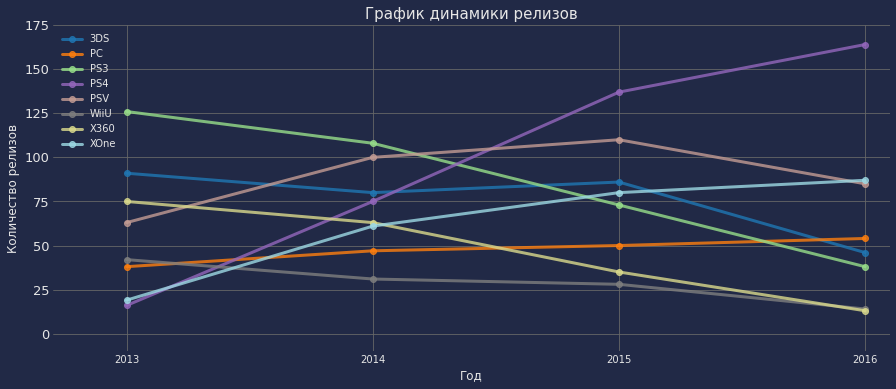

In [74]:
release_dynamics(actual_data)
plt.ylim(-10, 175);
plt.xlim(2012.7, 2016.1)
plt.yticks(np.arange(0, 200, 25))
plt.xticks(np.arange(2013, 2017, 1));

* Как уже упоминалось ранее, мы не можем оценить суммарные продажи в год, только суммарные продажи игры выпущенной в определенном году. 
* Падение с 2015 по 2016 для новых платформ говорит только о том, что новые игры вышедшие в 2016 еще не успели достичь уровня продаж игр вышедших в предыдущие годы. 
* Продажи игр на платформах предыдущего поколения падают, продажи игр на новых растут. 
* Особая ситуация с PC, на протяжении всей истории эта платформа сохраняла свою актуальность, но игры выпущенные на `PC` никогда не достигали показателей игр выпущенных на `консолях`. Суммарные продажи игр выпущенных в пик количества релизов в 2011, у `PC` почти в **5** раз меньше чем у `PS3`. 
* В 2017 `PC`, безусловно, сохранит свою актуальность, но в перспективности с точки зрения продаж явно продолжит отставать от `консолей`.
* Стоит ожидать, что в 2017 перспективность консолей прошлого поколения `X360` и `PS3` еще больше снизится.

 На основании всего этого, перспективными платформами на конец 2016 года можно назвать:  `PS4`, `XOne`, `PSV`, `3DS` и `PC`. 

### Построим график "Ящик с усами" по глобальным продажам

In [75]:
actual_platform = actual_data.query('platform in ["PC", "XOne", "PS4", "PSV", "3DS"]')

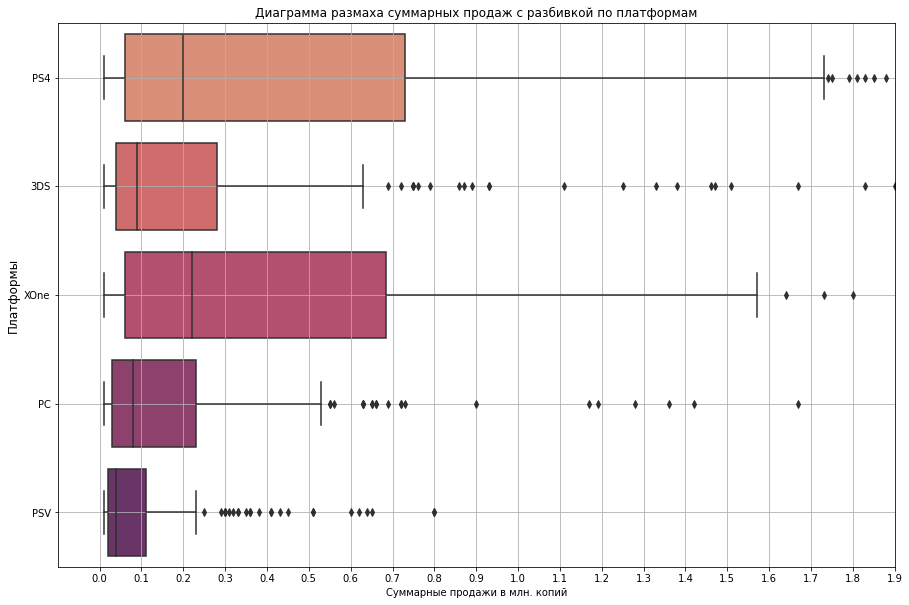

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(y='platform', x='total_sales', data=actual_platform, palette='flare')
sns.color_palette("tab10")
plt.xlim(-0.1, 1.9)
plt.grid(True)
plt.ylabel('Платформы', size=12)
plt.xticks(np.arange(0, 2, 0.1))
plt.xlabel('Суммарные продажи в млн. копий')
plt.title('Диаграмма размаха суммарных продаж с разбивкой по платформам');

* Показатели продаж у `PS4` и `XOne` схожи. 
* Медианное значения продаж игр на `PS4` и `XOne` более чем два раза больше, чем у игр на `PC`- около 200 тыс. против менее чем 100 тыс. копий
* Межквартильный размах у `PC` примерно в три раза уже чем у консолей. 
* Показатель суммарных продаж 75 % всех игр на `PC` не превышает 250 тыс. копий, тогда как у консолей этот показатель схож и почти достигает 700 тыс.
* 25 % самых успешных игр на `PC` имеют показатель продаж между 220 и  520 тыс. копий, у консолей 25 % самых продаваемых игр стартуют с показателя 700 тыс. и превышают 1.5 млн копий у `XOne` и 1.7 млн. копий у `PS4`
* Почти 75 % игр на `PSV` не имеют тираж больше 100 тыс. копий.
* Межквартильный размах `3DS` больше чем у `PC`

По суммарным продажам игры на `PC`, `PSV` и `3DS` значительно уступают показателям игр на стационарных консолях, все показатели кроме медианы у`PS4` немного обгоняют показатели у `XOne`.

### Изучим, как влияют на продажи игр для `PS4` отзывы пользователей и критиков

#### Отзывы пользователей

In [77]:
def scatter_user(data):
    fig, ax = plt.subplots(figsize=(14, 7))
    actual_data_extended.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.6, subplots=True, s=4, ax=ax, color='#008B8B')
    plt.ylabel('Оценки пользователей', size=12)
    plt.xlabel('Суммарные продажи в млн. копий', size=12)
    plt.xlim(-0.1, 2)
    plt.ylim(0, 10)
    plt.title(f'Диаграмма рассеяния для {data.platform.unique()} - Оценки пользователей - Продажи игры', size=15)
    ax.grid(color='#696969')

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


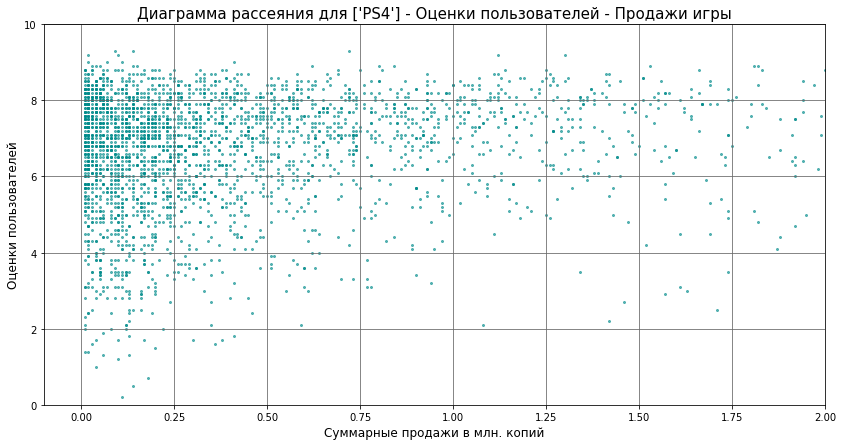

In [78]:
scatter_user(actual_data_extended.dropna().query('platform == "PS4"'));

In [79]:
(actual_data_extended
    .dropna()
    .query('platform == "PS4"')['user_score']
    .corr(actual_data_extended.query('platform == "PS4"')['total_sales'])
)

-0.03088781296873357

Судя по диаграмме рассеяния и коэффициенту пирсона, для `PS4` между оценками пользователей и  продажами игры отсутствует линейная корреляция

#### Отзывы критиков

In [80]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


In [81]:
def scatter_critic(data):
    fig, ax = plt.subplots(figsize=(14, 7))
    actual_data_extended.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.6, subplots=True, s=4, ax=ax, color='#008B8B')
    plt.ylabel('Оценки критиков', size=12)
    plt.xlabel('Суммарные продажи в млн. копий', size=12)
    plt.xlim(-0.1, 2)
    #plt.ylim(0, 10)
    plt.title(f'Диаграмма рассеяния - Оценки критиков - Игры на {data.platform.unique()}', size=15)
    ax.grid(color='#696969')

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


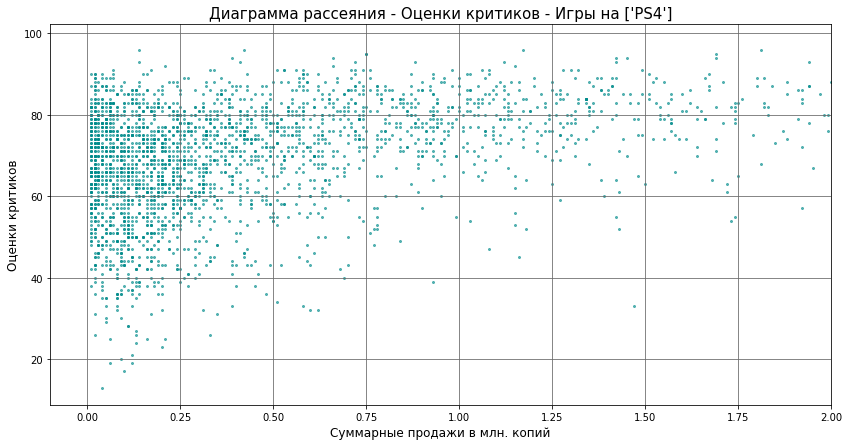

In [82]:
scatter_critic(actual_data_extended.dropna().query('platform == "PS4"'))

In [83]:
(actual_data_extended
    .dropna()
    .query('platform == "PS4"')['critic_score']
    .corr(actual_data_extended.query('platform == "PS4"')['total_sales'])
)

0.4035729107357781

Для `PS4` между оценками критиков и продажами игры линейная корреляция существует, хоть и не очень большая

### Соотнесем показатели для `PS4` с показателями для других платформ

Построим тепловую карту корреляции с разбивкой на платформы между продажами игры и оценками, которые она получила от пользователей и критиков 

Сгруппируем по платформам, посчитаем корреляцию и подготовим к склиянию в одну таблицу отдельно оценки пользователей и оценки критиков

In [84]:
critic_corr = (actual_data_extended
               .groupby('platform')['total_sales', 'critic_score'].corr()
               .reset_index()
               .iloc[:, [0, 3]]
               .query('critic_score != 1.0')
               .set_index('platform')               
              )

/tmp/ipykernel_157/2545963643.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  critic_corr = (actual_data_extended


In [85]:
user_corr = (actual_data_extended
               .groupby('platform')['total_sales', 'user_score'].corr()
               .reset_index()
               .iloc[:, [0, 3]]
               .query('user_score != 1.0')
               .set_index('platform')               
              )

/tmp/ipykernel_157/3857146420.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_corr = (actual_data_extended


In [86]:
scores_corr = user_corr.join(critic_corr)

In [87]:
scores_corr

,user_score,critic_score
platform,,
3DS,0.222078,0.348740
PC,-0.009642,0.299516
PS3,0.126033,0.433460
PS4,-0.031957,0.406568
PSV,0.013489,0.131763
WiiU,0.400219,0.348380
X360,0.114627,0.396910
XOne,-0.068925,0.416998


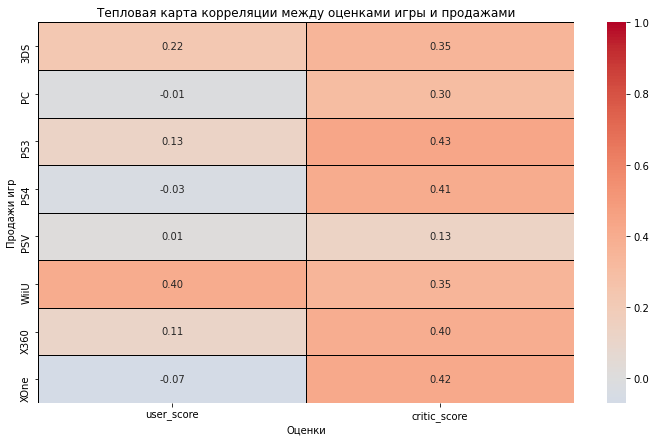

In [88]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(scores_corr, annot=True, fmt='.2f', linewidths=1, linecolor='black', center=0, vmax=1, cmap='coolwarm')
plt.title('Тепловая карта корреляции между оценками игры и продажами')
plt.ylabel('Продажи игр')
plt.xlabel('Оценки');

* Теперь нам видно, что значимая корреляция между оценками пользователей и продажами существует только у игр на `WiiU` - коэффициент Пирсона = 0.4 
* В то время как у оценок критиков существует такая корреляция со всеми платформами кроме `PSV`. Коэффициент Пирсона от 0.3 до 0.43

### Изучим общее распределение игр по жанрам

In [89]:
genre = (actual_data_extended
         .groupby('genre')
         .agg({'total_sales' : 'sum',
              'name' : 'count'})
         .sort_values(by='total_sales', ascending=False)
        )
genre.columns = ['total_sales', 'relise_count']

In [90]:
genre['mean_sales'] = genre['total_sales'] / genre['relise_count']
genre = genre.sort_values(by='mean_sales', ascending=False)

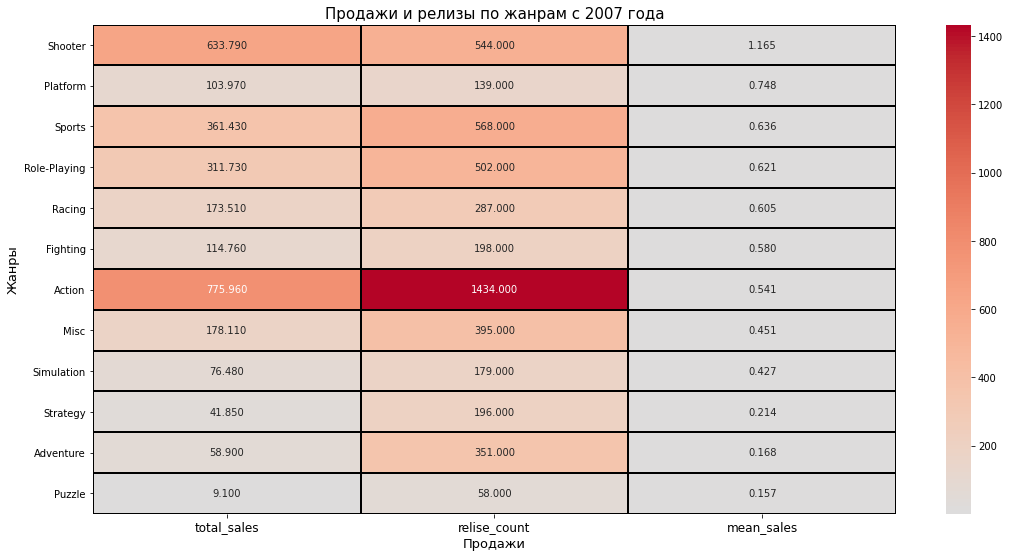

In [91]:
fig, ax = plt.subplots(figsize=(18, 9))
ax = sns.heatmap(genre, annot=True, fmt='.3f', linewidths=2, linecolor='black',  cmap='coolwarm', center=0)
plt.title('Продажи и релизы по жанрам с 2007 года', size=15)
plt.ylabel('Жанры', size=13)
plt.xlabel('Продажи', size=13)
plt.xticks(fontsize=12)
plt.show();

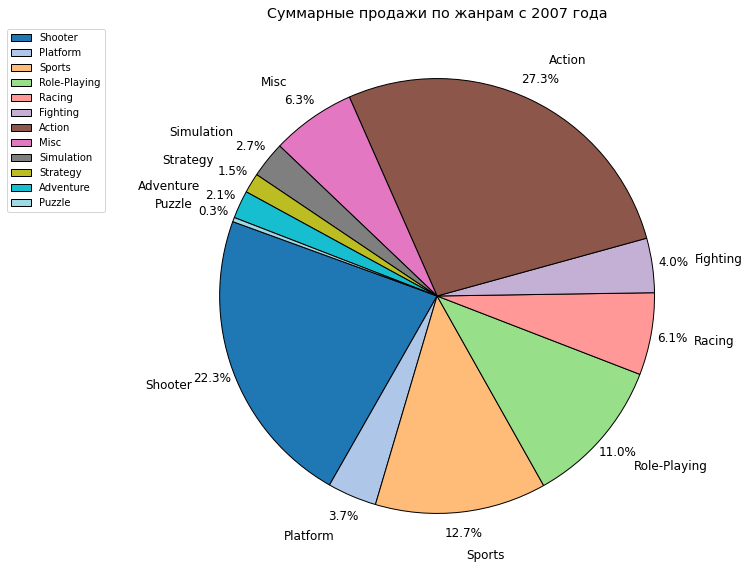

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rc('font', size=12)
genre['total_sales'].plot(kind='pie',
                          subplots=True,
                          autopct='%1.1f%%',
                          pctdistance=1.1,
                          labeldistance=1.2,
                          colormap='tab20',
                          ax=ax, startangle=160,
                          wedgeprops = {'edgecolor' : 'black',
                                        'linewidth' : 1,
                                        'antialiased' : True})
plt.ylabel('')
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(-0.3, 1))
plt.title('Суммарные продажи по жанрам с 2007 года');

* По показателям средних продаж лидером является `Shooter`, ближайший преследователь `Platform` отстает в 1.5 раза.
* Безусловный лидер по количеству релизов - `action`, а аутсайдер - `puzzle`
* По суммарным продажам `action`  также на первом месте, однако, по показателям средних продаж `action` располагется только на 7 месте.
* Релизов игр жанров `shooter` и `sports` почти одинаковое количество, но продаж у шутеров почти в 2 раза больше.
* Игры жанра `srategy`, `adventure` и `simulation` менее популярные и более нишевые продукты

## Составим портрет пользователя каждого региона. Определим для пользователя каждого региона следующее:

### Топ 5 самых популярных платформ

Воспользуемся выборкой с 2013 по 2016 год для отслеживания последних тенденций.

Сгруппируем данные региональных продаж по платформам 

In [93]:
actual_region_platform = (actual_data
                  .groupby('platform')
                   .agg({'na_sales' : 'sum',
                         'eu_sales' : 'sum',
                         'jp_sales' : 'sum'})
                  .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
                  )
                

Напишем функцию для построения круговой диаграммы

In [94]:
def top_5_platforms(data):
    fig, ax = plt.subplots(figsize=(9, 9))    
    (data
     .sort_values(ascending=False)
     .plot(kind='pie',
           subplots=True,
           autopct='%1.1f%%',
           colormap='coolwarm',
           ax=ax, startangle=60,
           pctdistance=1.1,
           labeldistance=1.2,
           wedgeprops = {'edgecolor' : 'black',
                         'linewidth' : 2,
                         'antialiased' : True})
    )
    plt.title(f'Топ-5 самых популярных {data.index.name} в {data.name[:2]}')
    plt.ylabel('')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize=(15))


Построим круговую диаграмму 5 самых популярных платформ для каждого регоина

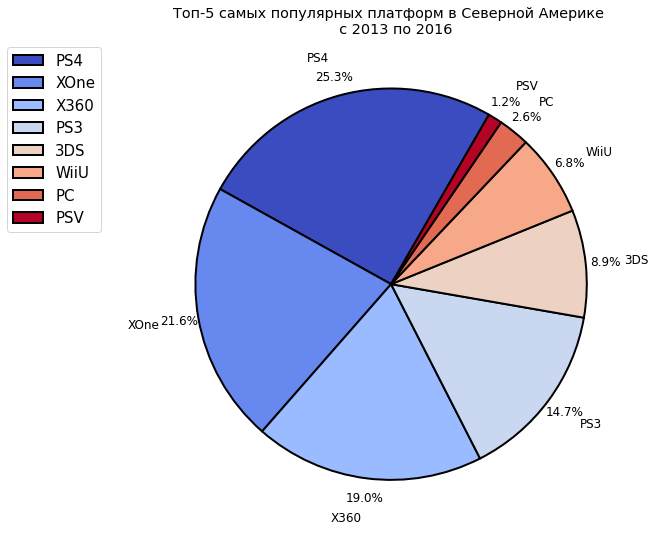

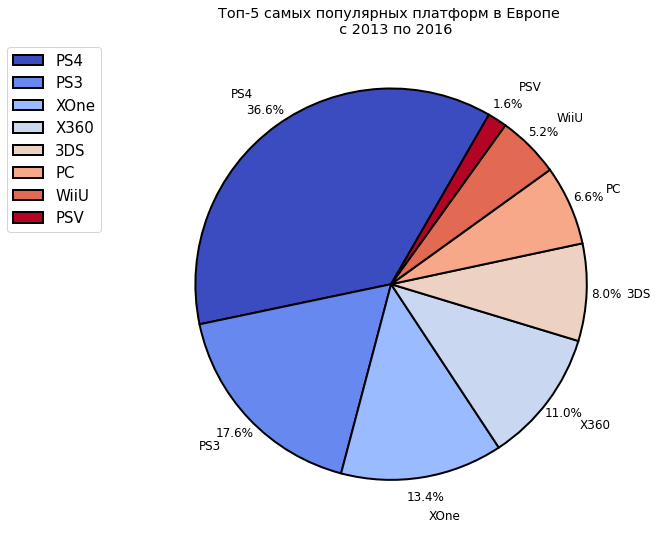

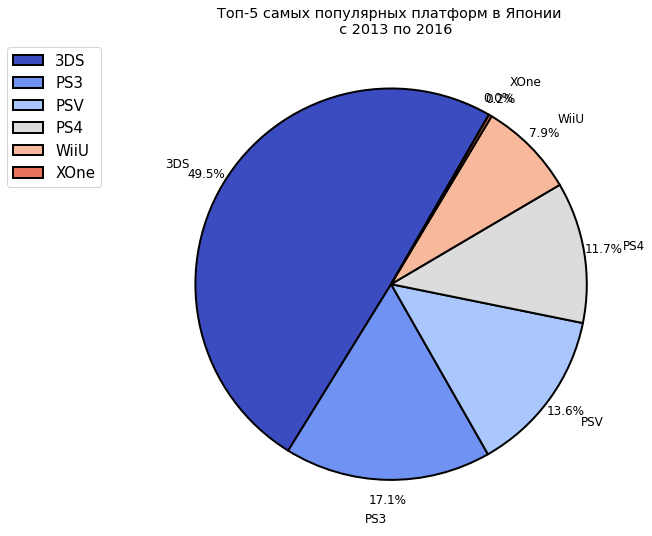

In [95]:
top_5_platforms(actual_region_platform['na_sales'])
plt.title('Топ-5 самых популярных платформ в Северной Америке \n  c 2013 по 2016')
top_5_platforms(actual_region_platform['eu_sales'])
plt.title('Топ-5 самых популярных платформ в Европе \n  c 2013 по 2016')
top_5_platforms(actual_region_platform.query('platform != "X360"')['jp_sales'])
plt.title('Топ-5 самых популярных платформ в Японии \n  c 2013 по 2016');

* В Северной Америке более 90% всех продаж приходится на 5 самых популярных платформ - `PS4`, `XOne`, `X360`, `PS3` и `3DS`
* В Европе 36% от всех продаж приходится на `PS4`, ближайший преследователь - `PS3` отстает в 2 раза, консоль нового поколения `XOne` занимает только 3 место c 13% продаж. Замыкают `X360` и `3DS`
* В Японии половина всех продаж приходится на `3DS`, `PS3` опережает `PS4`, а на долю новой `XOne` приходятся 0.2%

В Америке на первом месте японская `PS4`, а родные `XBox` только на 2 и 3 местах, В Европе еще больше лидирует новая консоль от `PlayStation`, `PC`имеет более чем в 2 раза больше продаж чем в Америке, но, к сожалению, это лишь 6.6%. В Японии же половина продаж приходится на портативную консоль `3DS`, а `XOne` практически не представлен на рынке.

### Топ 5 самых популярных жанров

Для выявления самых популярных жанров воспользуемся выборкой от 2007 года, так как, как уже было сказано ранее, игры выходят не каждый год поэтому взяв меньшую выборку мы рискуем не "зацепить" какую-нибудь успешную игру, повлиявшую на распределение по жанрам.

In [96]:
region_genre = (actual_data_extended
                   .groupby('genre')
                   .agg({'na_sales' : 'sum',
                         'eu_sales' : 'sum',
                         'jp_sales' : 'sum'})
                  .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
                  )

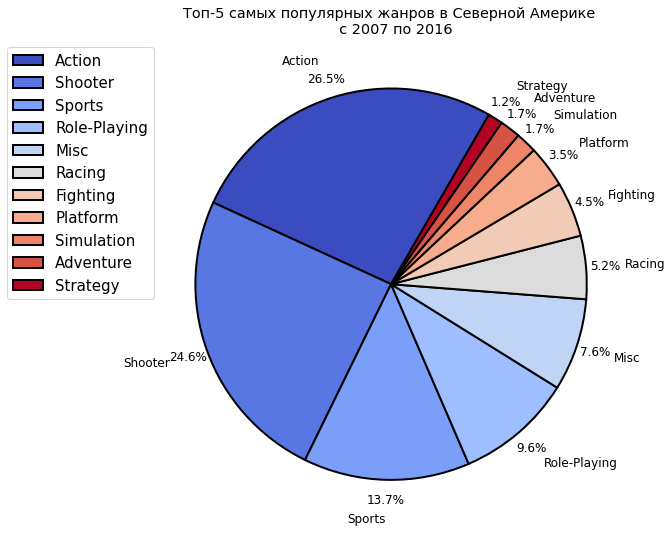

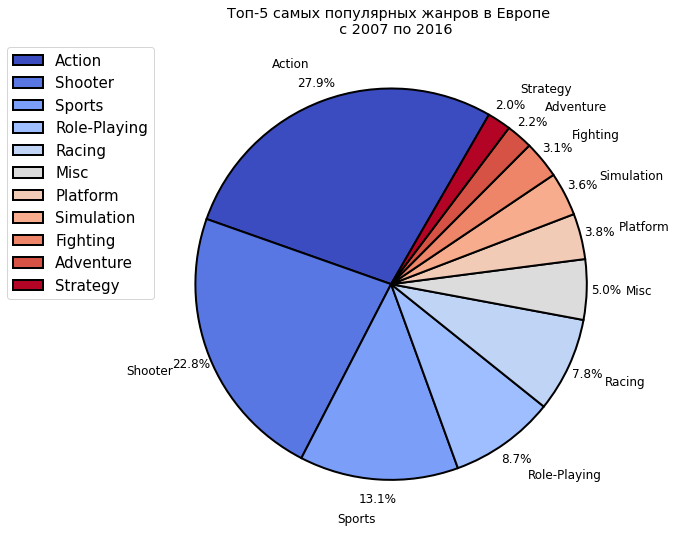

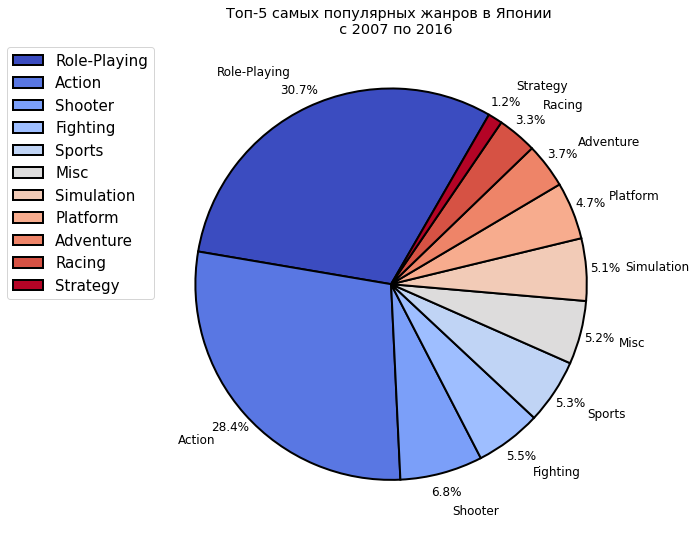

In [97]:
top_5_platforms(region_genre.query('genre != "Puzzle"')['na_sales'])
plt.title('Топ-5 самых популярных жанров в Северной Америке \n  c 2007 по 2016')
top_5_platforms(region_genre.query('genre != "Puzzle"')['eu_sales'])
plt.title('Топ-5 самых популярных жанров в Европе \n  c 2007 по 2016')
top_5_platforms(region_genre.query('genre != "Puzzle"')['jp_sales'])
plt.title('Топ-5 самых популярных жанров в Японии \n  c 2007 по 2016');

* В Северной Америке два самых популярных жанра - это `Action` и `Shooter` 26.5 и 24.6 % соответственно, на них приходится 51% всех продаж, следующий за ними `Sports` имеет уже в 2 раза меньше продаж , два замыкающих - `Role-Playing` и `Misc`
* В Европе топ-5 выглядит также как в америке, за исключением 5 места, вместо `Misc` тут расположился `Racing`
* В Японии 30 % продаж приходится на `Role-Playing`, 28% на `Action`, на третьем месте `Shooter` с 6.8%, а следующие 5 платформ различаются десятыми процента, из них в топ 5 попадают только `Fighting` и `Sports`

### Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

Построим график зависимости показателей средних продаж от возрастного рейтинга `ESRB` для трех регионов 

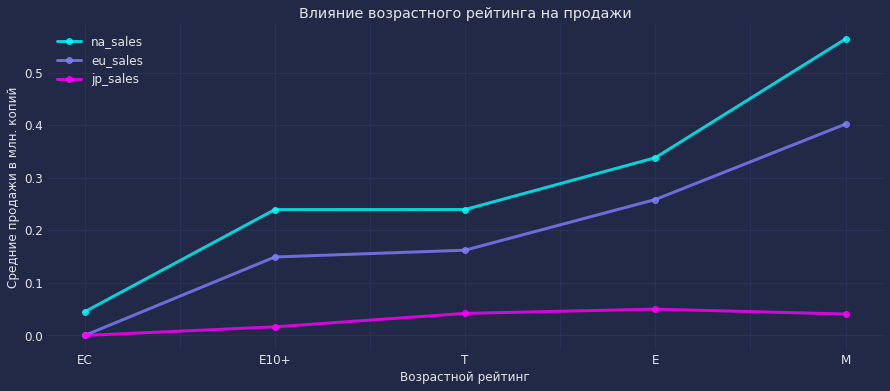

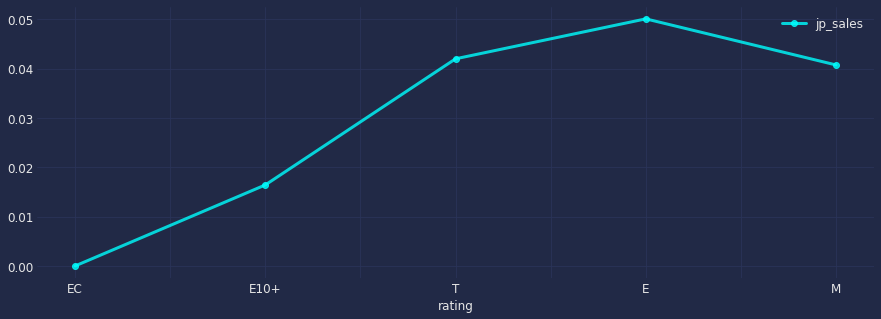

In [98]:
with plt.style.context('cyberpunk'):
    x = (actual_data_extended
       .groupby('rating')
       .agg({'na_sales' : 'mean', 
             'eu_sales' : 'mean', 
             'jp_sales' : 'mean'})
       .sort_values(by='na_sales', ascending=True)
        )
    x.plot(legend=True,  grid=True, style='-o', linewidth=3, colormap='cool', alpha=0.8, figsize=(15, 6))  
    plt.title(f'Влияние возрастного рейтинга на продажи')
    plt.ylabel('Средние продажи в млн. копий', size=12)
    plt.xlabel('Возрастной рейтинг', size=12)
    fig, ax = plt.subplots(figsize=(15, 6))
    x['jp_sales'].plot(legend=True,  grid=True, style='-o', linewidth=3, colormap='cool', alpha=0.8, figsize=(15,5))
    


В целом, можно утверждать, что присуждение более "взрослого рейтинга" связано с большими средними продажами, за исключением рейтинга `E - Everyone`, игры с которым в Америке и Европе находятся на 2 месте по средним продажам, а в Японии вообще на первом опережая рейтинг `M - Mature` 

### Портрет

Портрет пользователей получились следующими:
  * Американский пользователь использует стационарную приставку с большей вероятностью нового поколения и с одинаковой вероятностью от производителей `XBox` или `PlayStation`. Предпочитает игры жанров `Action` и `Shooter` имеющие возрастной рейтинг `Mature`
  * Европейский пользователь с вероятностью 50% использует одну из стационарных консолей `PlayStation`. Предпочтения в жанрах и возрастных рейтингах совпадает с американским пользователем.
  * Типичный японский пользователь использует `3DS` для игр жанров `Role Playing` и `Action` с возрастным рейтингом от `ESRB` `E, T или M`

## Проверим гипотезы

### Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые

Сформулируем гипотезы:
 + H_0 - Средние пользовательские рейтинги `Xone` и `PC`  равны.
 + H_1 - Средние пользовательские рейтинги `Xone` и `PC`  не равны.
 
Для проверки двусторонней гипотезы с двумя независимыми достаточно большими выборкам воспользуемся методом `scipy.stats.ttest_in`

In [99]:
data.query('platform == "XOne"')['year_of_release'].min()

2013

Игры для `XOne` на рынке с 2013, поэтому воспользуемся выборкой `actual_data`

In [100]:
pc_score = actual_data.query('platform == "PC"')['user_score'].dropna()
xbox_score = actual_data.query('platform == "XOne"')['user_score'].dropna()

In [101]:
alpha = 0.05
results = st.ttest_ind(pc_score, xbox_score)

print(f'P_value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги PC и XOne не равны')
else:
    print(' Нулевую гипотезу отвергнуть не удалось. \n Утверждать, что средние пользовательские рейтинги PC и XOne не равны нельзя')
    

P_value: 0.14012658403611647
 Нулевую гипотезу отвергнуть не удалось. 
 Утверждать, что средние пользовательские рейтинги PC и XOne не равны нельзя


### Средние пользовательские рейтинги жанров `Action` и `Sports`  разные.

Сформулируем гипотезы:
 + H_0 - Средние пользовательские рейтинги жанров `Action` и `Sports` равны.
 + H_1 - Средние пользовательские рейтинги жанров `Action` и `Sports`  не равны.
 
Для проверки двусторонней гипотезы с двумя независимыми достаточно большими выборкам воспользуемся методом `scipy.stats.ttest_in`

Так как `action`и `sports` встречаются с 1980, а в условии задания срок не уточнен, лучше воспользоваться исходной выборкой

In [102]:
action_score = data.query('genre == "Action"')['user_score'].dropna()
sports_score = data.query('genre == "Sports"')['user_score'].dropna()

Проверим размер выборок

In [103]:
print(f'Размер выборок с оценками жанров action и sports {action_score.shape[0]} и {sports_score.shape[0]} соответственно')

Размер выборок с оценками жанров action и sports 1796 и 1081 соответственно


Наши выборки различаются по размеру, поэтому укажем параметр equal_var как `False` для подсчета дисперсии выборок по отдельности.

In [104]:
alpha = 0.05
results = st.ttest_ind(action_score, sports_score, equal_var=False)

print(f'P_value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports не равны')
else:
    print(' Нулевую гипотезу отвергнуть не удалось. \n Утверждать, что средние пользовательские рейтинги жанров Action и Sports не равны нельзя')

P_value: 0.07370217419278526
 Нулевую гипотезу отвергнуть не удалось. 
 Утверждать, что средние пользовательские рейтинги жанров Action и Sports не равны нельзя


После проверки гипотез мы можем утверждать, что у нас нет оснований отбросить эти две гипотезы.

## Общий вывод

1. Мы загрузили данные и изучили общую информацию о них.
    - В датафрейме содержится информация о платформе, годе релиза, жанре, региональным продажам и оценках 16444 игр. 
    - Каждый релиз на другой платформе для одной и той же игры внесен отдельно, поэтому из 16144 игр - уникальных только 11426
    - Мы обнаружили пропуски в названии, жанрах , годе релиза, оценках критиков и пользователей и возрастном рейтинге
    - В столбце с оценками пользователей также обнаружили значение `TBD`
    
2. Выполнили предобработку данных:
    - Привели названия столбцов к нижнему регистру
    - Пропуски в `name` и `genre` были в одних и тех же двух строках и мы избавились от них.
    - Избавились от 269 пропусков в `year_of_release`, игры расположены не по хоронологии выхода и заполнить пропуски в году выпуска не представлялось возможным.
    - В `user_score` значение `TBD`, скорее всего, означает `To Be Determined`, но встречается не у новых игр и в нашем случае равнозначно пропускам, поэтому мы заменили на `NaN`
    - В столбцах `user_score`, `critic_score` и `rating` пропущенных значений от 40 до 54 % и абсолютное большинство их относится к одним и тем же играм. Можно предположить, что проблема в автомазированном сборе данных. Эти пропуски мы не стали трогать ради сохранения выборки.
    - Преобразовали данные столбца `user_score` в вещественный тип, а столбца `year_of_release` в целочисленный.
    - Полных строк-дубликатов не обнаружилось
    - Добавили новый столбец с суммарными продажами во всех регионах
    - Обнаружили 1 игру с возрастным рейтингом `RP`, означающим, что продукт ождиает получение рейтинга, проверили на сайте `ESRB` и поменяли на актуальный `E10+`
    
3. Провели исследовательский анализ данных и выяснили следующее:
    - С 1980 по 1990 разработка новых игр практически не велась, рассвет отрасли начался с 1990
    - До 2002 количество релизов совпадает с количеством уникальных игр, но дальше различия становятся все существенне, что, скорее всего, связано с выпуском мультиплатформенных игр. В 2009 уникальных игр вышло около 1000, а релизов на всех платформах было более 1400
    - с 2005 по 2012 наблюдается бум разработки и выпуска видеоигр, а с 2012 до 2015 снижение до уровня 2000 года.
    - С развитием индустрии на смену старым платформам приходит все больше новых
    - Платформа сохранаяет свою актуальность обычно не более 5-10 лет
    - Абсолютным лидером по количеству релизов до 2016 являются `PS2` и `DS`, годовой рекорд принадлежит играм на `DS` - около 500 релизов в 2008.
    - По продажам игр с 1997 по 2006 выделялся безусловный лидер, до 2001 - `PS`, а после него `PS2`, однако, с 2007 продажи распределены равномерно между крупными платформами
    - В течение 1-3 лет после появления платформы нового поколения, продажи игр на платформах старого поколения сходят на нет
    - На протяжении всего периода `PC` как платформа оставалась актуальной, но всегда осталась менее перспективной чем консоли с точки зрения продаж
    - Между оценками критиков и суммарными продажами существует корреляция у всех платформ кроме `PSV`, тогда как между оценками пользователей и продажами корреляция наблюдается только для платформы `WiiU`
    - По количеству релизов безусловный лидер `action`, по продажам `action` также лидирует, однако, опережая `shooter` по релизам практически в 3 раза, по суммарным продажам превосходит лишь на 5%, 27.3% против 22.3%. Это говорит о том, что шутеры в среднем продаются лучше.
    - Абсолютный аутсайдер игры жанра `Puzzle` с 0.3%, что логично.
    
4. Определили для пользователей каждого регоина:
    1. Топ 5 самых популярных платформ
       + В Америке это `PS4, XOne, X360, PS3 и 3DS`
       + В Европе это `PS4, PS3, XOne, X360 и 3DS`
       + В Японии это `3DS, PS3, PSV, PS4 и WiiU`
       
  В Америке на первом месте японская `PS4`, а родные `XBox` только на 2 и 3 местах, В Европе еще больше лидирует новая консоль от `PlayStation`, `PC`имеет более чем в 2 раза больше продаж чем в Америке, но, к сожалению, это лишь 6.6%. В Японии же половина продаж приходится на портативную консоль `3DS`, а `XOne` практически не представлен на рынке.

    2. Топ 5 самых популярных жанров.
        + В Америке это `Action, Shooter, Sports, Role-Playing и Misc`
        + В Европе это `Action, Shooter, Sports, Role-Playing и Racing`
        + В Японии это `Role-Playing, Action Shooter Fighting и Sports`
        
  Причиной такой идентичности между Америкой и Европой и разница с Японией могут быть  культурные особенности.

    3. Выяснили, что для всех регионов присуждение более "взрослого рейтинга" связано с большими средними продажами, за исключением рейтинга `E - Everyone`, игры с которым в Америке и Европе находятся на 2 месте по средним продажам, а в Японии вообще на первом опережая рейтинг `M - Mature` 
    4. Составили портрет пользователя каждого региона:
        + Американский пользователь использует стационарную приставку с большей вероятностью нового поколения и с одинаковой вероятностью от производителей `XBox` или `PlayStation`. Предпочитает игры жанров `Action` и `Shooter` имеющие возрастной рейтинг `Mature`
        + Европейский пользователь с вероятностью 50% использует одну из стационарных консолей `PlayStation`. Предпочтения в жанрах и возрастных рейтингах совпадает с американским пользователем.
        + Типичный японский пользователь использует `3DS` для игр жанров `Role Playing` и `Action` с возрастным рейтингом от `ESRB` `E, T или M`
5. Проверили гипотезы:
    - О равенстве средних пользовательских оценок игр на `PC` и `XOne`
    - О равенстве средних пользовательских оценок игр жанров `Action` и `Sports`  
    
Обе гипотезы отвергнуть не удалось. 

6. Успешность игры, помимо, очевидно, ее качества, определяет сочетание популярной платформы и жанра, наиболее востребованного в том регионе, в котором максимально активно используется платформа игры. 

    + Наиболее перспективными с точки зрения продаж являются Американский и Европейский рынок, и нужно ориентироваться на них
    + Из платформ наиболее перспективные `PS4` и `XOne`. `PS4` располагается на первом месте по популярности и в Европе и в Америке, и, даже в Японии входит в топ 5 платформ и занимает 4 место. `PS4` однозначно является наиболее перспективной и универсальной платформой.
    + Из жанров, наиболее перспективными являются Шутеры как самые продающиеся. В Европе и Америке около четверти продаж приходится на них. Также, исходя из ориентации на европейский и американские рынки, перспективными являются игры жанров `Sports`  и `Role-Playing`, `Platform` на этих рынках популярностью не пользуется.
    + Что касается взрослого контента и соответствующего ему возрастного рейтинга, нужно целиться либо в категорию для `Mature` - для взрослых, либо в `Everyone` - для всех. Иные рейтинги связаны с более низкими средними продажами.
    
    